<a href="https://colab.research.google.com/github/ben2503/data_insurance/blob/main/1_benzhang__Snipets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration d'un dataframe


In [ ]:
def quick_explore(dataframe):
    """
    Fonction d'exploration rapide des données.
    """
    # Afficher quelques lignes
    print("###### Observer des lignes ######")
    display(dataframe.head(10))


    # Afficher le nombre de lignes et colonnes
    print("###### Dimensions du dataset ######")
    print(f"Lignes : {dataframe.shape[0]}, Colonnes : {dataframe.shape[1]}\n")

    # Informations sur les colonnes
    print("###### Informations sur les colonnes ######")
    print(dataframe.info(), "\n")

    # Les nom de colonnes
    print(list(dataframe.columns))
    print()

    # Nombre de valeurs uniques par colonne
    print("###### Nombre de valeurs uniques par colonne ######")
    print(dataframe.nunique(), "\n")

    # Description des colonnes numériques avec les déciles
    print("###### Description des colonnes numériques ######")
    stats = dataframe.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).T
    print( stats.to_markdown(), "\n")

    # Nombre de valeurs manquantes par colonne
    print("###### Nombre de NaN par colonne ######")
    nan_nb = dataframe.isna().sum()
    print(nan_nb)

    # Pourcentage de valeurs manquantes par colonne
    print("###### Pourcentage de NaN par colonne ######")
    nan_percentage = (dataframe.isnull().sum() / len(dataframe)) * 100
    only_nan  = nan_percentage[nan_percentage > 0].sort_values(ascending=False)
    print(only_nan, "\n")

    # Nombre de doublons
    print("###### Nombre de doublons ######")
    print(dataframe.duplicated().sum(), "doublon(s) trouvé(s).\n")

print(quick_explore(df))

#Explorer les colonnes catégorielles d'un dataframe

In [ ]:
#Faire la variable liste_cols avec les colonnes catégorielles à explorer

def explore_category(data, list_cols):
    """
    Fonction pour explorer les modalitées des colonnes catégorielles
    """
    for col in list_cols :
        print(f"###### colonne : {col} ######")
        print()
        distribution = data[col].value_counts()
        df_distribution =  distribution.reset_index()
        df_distribution['percent'] =  df_distribution['count'] *  100 / len(data)

        print(df_distribution)
        print()

#API : Fonction de requête



## API-1 accéder aux différentes informations dans la réponse JSON de l'API
### JSON est un format de données impliquées léger et facile à lire, utilisé pour l'échange de données entre applications. Bien qu'il soit basé sur la syntaxe JavaScript,

In [ ]:
import json
import requests

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/monthlySalesbyCategoryMultiple.json"
# This function gets the file content from the URL
r = requests.get(link)
# You can access to the text content with this function
r.text

# Try this
import json

data = json.loads( r.text)
data

list_furniture = data["contents"][0]["monthlySales"]
sales_total_furniture = 0
for indice, valeur in enumerate(list_furniture ) :
  sales_total_furniture += valeur["sales"]
print(f'Furniture : {sales_total_furniture}')

## API-2 : API et API rest

GET: Retrieve a resource (e.g., fetching user details).
POST: Create a resource (e.g., adding a new user).
PUT: Update a resource (e.g., modifying user information).
DELETE: Remove a resource (e.g., deleting a user).

In [ ]:
import requests
import pandas as pd

# 1) URL de l'API des blagues Chuck Norris
link = 'https://data.nantesmetropole.fr/api/explore/v2.1/catalog/datasets/244400404_stations-velos-libre-service-nantes-metropole-disponibilites/records?limit=20'
# Effectuer une requête à l'API
r = requests.get(link)
data = r.json()
# display(r.json())

# 2) Normalisation des données dans un DataFrame
df = pd.json_normalize(r.json(),
                      record_path= "results"
                       )
# 3) Traiter les données dans df : filtrer + traiter NaN
df_filtre = df[['address','available_bikes','bike_stands']]
# print(df_filtre)

# Vérifier les Nan
display(df['available_bikes'].isna ().sum())
display(df['bike_stands'].isna ().sum())


# supprimer les lignes de 'NaN' selon les données sur la colonne 'taux remplissage',
df_copy = df.copy()
df_copy['Adress']=df_copy['address']
df_copy['taux remplissage'] = df_copy['available_bikes']/df_copy['bike_stands']
# dropna(inplace = True ) : remplacer l'ancien version
df_copy.dropna(subset = "taux remplissage", how="all", inplace=True)
display(df_copy[['Adress','taux remplissage']].head())



np.int64(0)

np.int64(0)

,Adress,taux remplissage
0,"5, boulevard de Berlin",0.450000
1,"9, rue François Albert",0.533333
2,"18, rue Talensac - 26, rue de Bel Air",0.000000
3,Rue de Berry - Rue des Hauts Pavés,0.687500
4,Rue de la Loire - place Gaston Defferre,0.272727


## API-3 :  les statuts HTTP

2xx (Succès) : 200 OK, 201 Created, 204 No Content 3xx (Redirection) : 301 Moved Permanently, 304 Not Modified 4xx (Erreur client) : 400 Bad Request, 401 Unauthorized, 404 Not Found 5xx (Erreur serveur) : 500 Internal Server Error, 503 Service Unavailable

#Geocoding Nominatim search

search : savoir : l'adresse ; à trovuer : longtitude + latitude.




# Geocoding Nominatim reverse


reverse : savoir  : longtitude + latitude ;  à trouver : l'adresse.


#Geocoding Datagouv search

search : savoir : l'adresse ; à trovuer : longtitude + latitude.

In [ ]:
# Méthode 1

# Je veux les coordonnées de cette adresse :
adresse = "10 rue de la Paix, Paris"

# URL du nouvel endpoint IGN Search
url = f"https://data.geopf.fr/geocodage/search?q={adresse}"

# Je récupère la donnée avec le GET
response = requests.get(url)

# Je mets ma donnée sous format json et je parcours ce json pour accéder à l'information.
data = response.json()
data_coord = data['features'][0]['geometry']['coordinates']
print(data_coord)

[2.33115, 48.868989]


In [ ]:
data_coord_reverse=[data_coord[1], data_coord[0]]
print(data_coord_reverse)

[48.868989, 2.33115]


## Folium

In [ ]:

# Puis vous pouvez ajouter des points de repère et mettre un commentaire cliquable
import folium

m = folium.Map(location=data_coord_reverse)
folium.Marker(
    location=data_coord_reverse,radius=45,
    popup='Un bon restau sur le pouce',  # Texte qui apparaît au clic
    tooltip='Cliquez ici'  # Texte qui apparaît au survol
    ).add_to(m)
m

#Geocoding datagouv reverse

reverse : savoir : longtitude + latitude ; à trouver : l'adresse.

In [ ]:
# J'ai ces coordonnées (longitude, latitude) et je veux une adresse
lon = 2.40604
lat = 48.868851

# URL du nouvel endpoint IGN Reverse
url = f"https://data.geopf.fr/geocodage/reverse?lon={lon}&lat={lat}"

# Je récupère la donnée avec le GET
response = requests.get(url)

# Je mets ma donnée sous format json et je parcours ce json pour accéder à l'information.
data = response.json()
print(f"l'adresse est : {data['features'][0]['properties']['label']}")

l'adresse est : 10 Rue de la Paix 75002 Paris


# ML_panda_importer_quick explore

## importer de drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Note ben 2503/Révision_Ben/Bloc_4_PowerBi+ML_KNN_non_supervise+prediction/revision_bloc4_S22/1429_1.csv')
df.head()

## importer de csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Fully-san/WildCodeSchool/refs/heads/master/disney_movies_total_gross.csv')
df.head(10)

## Exporter à csv

In [ ]:
df.to_csv("df_clean.csv")

## function_quick_explore

In [ ]:
def quick_explore(dataframe):
    """
    Fonction d'exploration rapide des données.
    """
    # Afficher quelques lignes
    print("###### Observer des lignes ######")
    display(dataframe.head(10))


    # Afficher le nombre de lignes et colonnes
    print("###### Dimensions du dataset ######")
    print(f"Lignes : {dataframe.shape[0]}, Colonnes : {dataframe.shape[1]}\n")

    # Informations sur les colonnes
    print("###### Informations sur les colonnes ######")
    print(dataframe.info(), "\n")

    # Les nom de colonnes
    print(list(dataframe.columns))
    print()

    # Nombre de valeurs uniques par colonne
    print("###### Nombre de valeurs uniques par colonne ######")
    print(dataframe.nunique(), "\n")

    # Description des colonnes numériques avec les déciles
    print("###### Description des colonnes numériques ######")
    stats = dataframe.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).T
    print( stats.to_markdown(), "\n")

    # Nombre de valeurs manquantes par colonne
    print("###### Nombre de NaN par colonne ######")
    nan_nb = dataframe.isna().sum()
    print(nan_nb)

    # Pourcentage de valeurs manquantes par colonne
    print("###### Pourcentage de NaN par colonne ######")
    nan_percentage = (dataframe.isnull().sum() / len(dataframe)) * 100
    only_nan  = nan_percentage[nan_percentage > 0].sort_values(ascending=False)
    print(only_nan, "\n")

    # Nombre de doublons
    print("###### Nombre de doublons ######")
    print(dataframe.duplicated().sum(), "doublon(s) trouvé(s).\n")

print(quick_explore(df))

NameError: name 'df' is not defined

# ML_Comment choisir son modèle de Machine Learning : étape par étape

Comment choisir son modèle de Machine Learning : étape par étape
Définir ton objectif,
Commence toujours par te demander : Que veux-tu prédire ?
Si tu veux prédire une catégorie (exemples : spam ou non-spam, client satisfait ou non), tu es dans un problème de classification.,
Si tu veux prédire une valeur numérique (exemples : prix, durée, température), tu es dans un problème de régression.,

Comprendre tes données,
Avant de choisir un modèle, pose-toi les bonnes questions :
As-tu beaucoup ou peu de données ?
As-tu des données numériques, catégorielles ou un mélange ?
Est-ce que les relations entre les variables semblent linéaires ou complexes ?
Les données sont-elles propres et bien préparées (peu de valeurs manquantes, peu de bruit) ?
Les catégories sont elles bien équilibrées ? ( autant de malades que de pas pas malades etc. )

Préparer les données pour le Machine Learning,
Tu peux échantillonner si les classes sont déséquilibrées.
Tu prépares ton Train Test Split.

Choisir un modèle simple pour commencer,
Toujours commencer simple, puis complexifier si nécessaire :
Régression linéaire : pour prédire une valeur, si les relations sont simples.
Régression logistique : pour prédire une classe (oui/non), avec peu de variables.
Arbre de décision : facile à comprendre et à visualiser, utile pour les deux types de problèmes.
k plus proches voisins (k-NN) : bien pour des petits jeux de données simples.

Tester un modèle plus puissant si besoin,
Si les performances sont insuffisantes :
Random Forest : robuste, gère bien les données tabulaires.
Gradient Boosting (XGBoost, LightGBM) : très performant mais plus complexe.
SVM : utile si tes données sont bien séparées.

3

1
[11:59]
Choisir les bonnes métriques,
Selon le type de problème, certaines métriques sont plus utiles que d'autres :

Pour la classification :
Accuracy (taux de bonnes prédictions)
Précision, rappel, F1-score (surtout si les classes sont déséquilibrées)

Pour la régression :
MAE (erreur moyenne absolue)
RMSE (erreur quadratique moyenne)
R² (proportion de variance expliquée)

Réfléchir au fitness de son modèle :,
On veut que les deux scores, Train et Test, soient les plus hauts possibles, c'est comme une note sur 10, donc on veut que notre modèle ait très bien appris.
Sous-Apprentissage / UnderFitted: Train_Score << Test_Score
Sur_Apprentissage // OverFitted : Test_Score << Train_Score
Bon Apprentissage // WellFitted : Test_Score == Train_Score (approximativement, comparer à la deuxième décimal près, par exemple, 0,89 et 0,87)

Évaluer, comparer, ajuster,
Enfin, entraîne plusieurs modèles, compare leurs performances, et choisis celui qui donne un bon compromis entre performance et compréhension.

Améliorer,
Cross-validation, GridSearch (hyperparamètres), Normalisation // Standardisation des données (Standard/Robust Scarler)

# ML Supervisé REGRESSION

## Modèle 1 : ML_regression_simple

### 1-1 : nettoyage (drop_nan)

In [ ]:
# Import bibliothèque de manipulation de dataframe
import pandas as pd

# Import des bibliothèques de viz
import matplotlib.pyplot as plt
import seaborn as sns

# Import split data
from sklearn.model_selection import train_test_split

# Import modèles de ML Supervisé Régression
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import LinearSVR

# Import modèles de ML Supervisé Classification
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

# Import modèle de ML NON Supervisé
from sklearn.neighbors import NearestNeighbors

# Import modèles de ML Supervisé Régression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Import des métriques
from sklearn.metrics import mean_absolute_error, root_mean_squared_error,mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Import outil standardisation de la donnée
from sklearn.preprocessing import StandardScaler

# Import pipeline
from sklearn.pipeline import Pipeline

# Gestion des warnings
import warnings

# Find the square root of different numbers KNN:
import math

# Effectuez une régression polynomiale
from sklearn.preprocessing import PolynomialFeatures

# L'URL pointe directement vers le fichier CSV pour le vin rouge
csv_url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
csv_ur2 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
# Les noms de colonnes sont dans la première ligne, mais séparés par ';', on ajuste read_csv
df1 = pd.read_csv(csv_url,)
df2 = pd.read_csv(csv_ur2,)
df_full = pd.merge(df1, df2, how="left", left_on= 'DATE', right_on='date')
df_full = df_full.drop(columns = "date")
df_full.isna().sum()

#créer un dataframe qui ne contient que les lignes ayant des valeurs manquantes
condition = df_full.isna().any(axis = 1)
df_nan1 = df_full[condition]
#display(df_nan1 )
#print(df_nan1.shape)

# supprimer les nan
df_sans_nan = df_full.dropna()

#check les nan
#print(df_sans_nan.isna().sum())

#check doublon
#print(df_sans_nan.shape)
#print(df_sans_nan.drop_duplicates().shape)

### 1-2 : créer une function de corrélation


In [ ]:

# Méthode 2  : calculer la correlation avec function

def get_most_corr(df, target , seuil = 0.5):
    corr_target = df.corr(numeric_only=True)[target].drop(index = target).sort_values().abs()
    condition = corr_target >= seuil
    most_corr_target = corr_target[condition]
    corr_cols = most_corr_target.index.to_list()
    return corr_cols

cols = get_most_corr(df_sans_nan, "SUNHOUR")
print(cols)

['CLOUDCOVER_AVG_PERCENT', 'HUMIDITY_MAX_PERCENT', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'TEMPERATURE_EVENING_C', 'MAX_TEMPERATURE_C', 'TEMPERATURE_NOON_C', 'HEATINDEX_MAX_C']


### 1-3 : créer la function : calcul_regression

In [ ]:
# 2- créer la function : calcul_regression :
def calcul_regression(model_simple, target , col ):

# define X et y
  X = df_sans_nan[col]
  y = df_sans_nan[target]

# Diviser les données
  X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X,y,test_size=0.2,random_state=42)

# sans créer un modèle
  # model_simple = LinearRegression()

# entraîner un modèle
  model_simple.fit(X_train_s, y_train_s)

# Prédiction sur les données d'entrainement afin de comparer les scores sur le train et sur le test :
  y_pred_s_train = model_simple.predict(X_train_s)
# Prédiction sur les données de test
  y_pred_s_test = model_simple.predict(X_test_s)

# entraîner le modèle
# .fit() apprend les coefficients (b0 et b1) à partir des données d'entraînement (X_train_s, y_train_s)
# model_simple.fit(X_train_s, y_train_s)

# évaluer les performances de ce modèle
  r2_simple_train = round(metrics.r2_score(y_train_s, y_pred_s_train),2)
  r2_simple_test = round(metrics.r2_score(y_test_s, y_pred_s_test),2)
  # print(f" - R² score sur le train: {r2_simple_train:.4f}")
  # print(f"- R² score sur le test: {r2_simple_test:.4f}")

#autre métriques : mae/rmse
  mae = round(metrics.mean_absolute_error(y_test_s, y_pred_s_test),2)
  # print(f'mae : {mae}')
  rmse = round(metrics.root_mean_squared_error(y_test_s, y_pred_s_test),2)
  # print(f'rmse : {rmse}')
  # Commentaire  : rmse > mae : indique des grandes erreurs, c'est due à la présence des valeurs aberantes

  metrics_dico = {"r2 score train": r2_simple_train, "r2 score test" : r2_simple_test, "MAE test": mae , "RMSE":rmse}

  return pd.json_normalize(metrics_dico)

### 1-4 : créer la function : définir les modèles de régression à appliquer : LinearSVR/SGDRegressor/LinearRegression/KNeighborsRegressor

In [ ]:
# 3 créer la function : définir les modèles de régression à appliquer : LinearSVR/SGDRegressor/LinearRegression/KNeighborsRegressor

models = [LinearRegression(), KNeighborsRegressor(), LinearSVR(), SGDRegressor()]

for model in models :
    result = calcul_regression( model, target = 'SUNHOUR', col = cols)
    print(f"####### Model : {model} ##############")
    print()
    print(result)


# Commentaires R2 :
# ecart (train - test) >  0,1 + train et test  > 0,7 ( 0,5) : overfitting
# ecart (train - test) < 0,1 +  train et test  > 0,7(0,5)  : goodfitting
# ecart (train et test) <  0,7 (0,5) : underfitting


####### Model : LinearRegression() ##############

   r2 score train  r2 score test  MAE test  RMSE
0            0.68           0.66      1.66   2.0
####### Model : KNeighborsRegressor() ##############

   r2 score train  r2 score test  MAE test  RMSE
0            0.78           0.71      1.42  1.83
####### Model : LinearSVR() ##############

   r2 score train  r2 score test  MAE test  RMSE
0            0.51           0.53      1.86  2.36
####### Model : SGDRegressor() ##############

   r2 score train  r2 score test      MAE test          RMSE
0   -1.249588e+24  -1.253508e+24  3.071062e+12  3.827521e+12


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 1-5 : Améliorer kNN regressor ( KNeighborsRegressor ) en jouant sur les hyperparametres


In [ ]:
# 2-4-1 Trouver maximum de nbr de voisin_kNN regressor ( KNeighborsRegressor )
optimal = round(math.sqrt(len(X_train_s)))
print(optimal)


# 2-4-2 n_neighbors/nombre voisin : 3 et 15 + step : 2_kNN regressor ( KNeighborsRegressor )
for k in range(3, optimal + 1,2):
    print(f" nombre voisin {k}")
    model = KNeighborsRegressor(n_neighbors=k)
    result = calcul_regression( model, target = 'SUNHOUR', col = cols)
    display(result)
    print("########################################")

# 3  Calculer la regressor pour toutes les colonnes (non filtre : seuil(corr()) = 0, dans 2 partie : seuil (corr()) > = 0,5 )
models = [LinearRegression(), KNeighborsRegressor(), LinearSVR(), SGDRegressor()]
cols_all = get_most_corr(df_sans_nan, "SUNHOUR" , seuil = 0)
print(cols_all)

for model in models :
    result = calcul_regression( model, target = 'SUNHOUR', col = cols_all)
    print(f"####### Model : {model} ##############")
    print()
    print(result)

### 1-6 : Heatmap

In [ ]:
sns.pairplot(df_sans_nan)

## Modèle 2 : ML_regression + prédiction le prix de téléphone

### 2-1

# ML Supervisé CLASSIFICATION

### ML_Classification_Outler : IQR & Z-score_KNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('https://raw.githubusercontent.com/Fully-san/WildCodeSchool/refs/heads/master/penguins.csv')
# df.head()

df.loc[df['sex'].isna()]

df = df.loc[~df['culmenLength'].isna()]

predDf = df.loc[(df['sex'].isna()) | (df['sex'] == '.')]
df = df.loc[(~df['sex'].isna()) & (df['sex'] != '.')]

sns.pairplot(df)

# Tester outler
## ➕ Méthode : IQR (Interquartile Range)
for column in df.columns[:-1]:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    higher = q3 + 1.5 * iqr

    outliers = df.loc[(df[column] < lower) | (df[column] > higher)]
    print(column, ':')
    print(outliers, '\n')

## ➕ Méthode : Z-score
from scipy.stats import zscore

df2 = df.copy()

df2['ZScore'] = zscore(df2['flipperLength'])
df2[abs(df2['ZScore']) > 3]

## Normalisation et Standardisation
X = df.drop(columns='sex')
y = df['sex']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_minMax = scaler.fit_transform(X)
X_minMax

# for i in range(len(X_minMax)): (pondération)
#     X_minMax[i][0] *= 100

X_train, X_test, y_train, y_test = train_test_split(X_minMax, y, test_size=0.25, random_state=0)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(f"Accuracy sur le train : {score_train:.2f}")
print(f"Accuracy sur le test : {score_test:.2f}")

# Matrice de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")

# Utilisation du modèle
predDf['sex'] = model.predict(scaler.transform(predDf.drop(columns='sex')))
predDf

### Méthode classic_ML Supervisé CLASSIFICATION_support

In [ ]:
# Chargement des données et pré-traitement

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Fully-san/WildCodeSchool/refs/heads/master/disney_movies_total_gross.csv')
df.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


In [ ]:
df = df.rename(columns={'movie_title' : 'title', 'release_date' : 'releaseDate', 'mpaa_rating' : 'rating', 'total_gross' : 'totalGross', 'inflation_adjusted_gross' : 'totalGrossWithInflation'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    579 non-null    object
 1   releaseDate              579 non-null    object
 2   genre                    562 non-null    object
 3   rating                   523 non-null    object
 4   totalGross               579 non-null    int64 
 5   totalGrossWithInflation  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [ ]:
df['year'] = pd.to_numeric(df['releaseDate'].str[:4])

df = df.drop(columns=['title', 'releaseDate'])

df['hit'] = df['totalGross'] > 100000000

df.duplicated().sum()

np.int64(0)

In [ ]:
df['rating'].value_counts()

,count
rating,
PG,187
PG-13,145
R,102
G,86
Not Rated,3


In [ ]:
df.loc[df['rating'].isna(), 'rating'] = 'G'
df['rating'].isna().sum()

df['rating'].value_counts()

,count
rating,
PG,187
PG-13,145
G,142
R,102
Not Rated,3


Accuracy sur le train : 0.84
Accuracy sur le test : 0.79


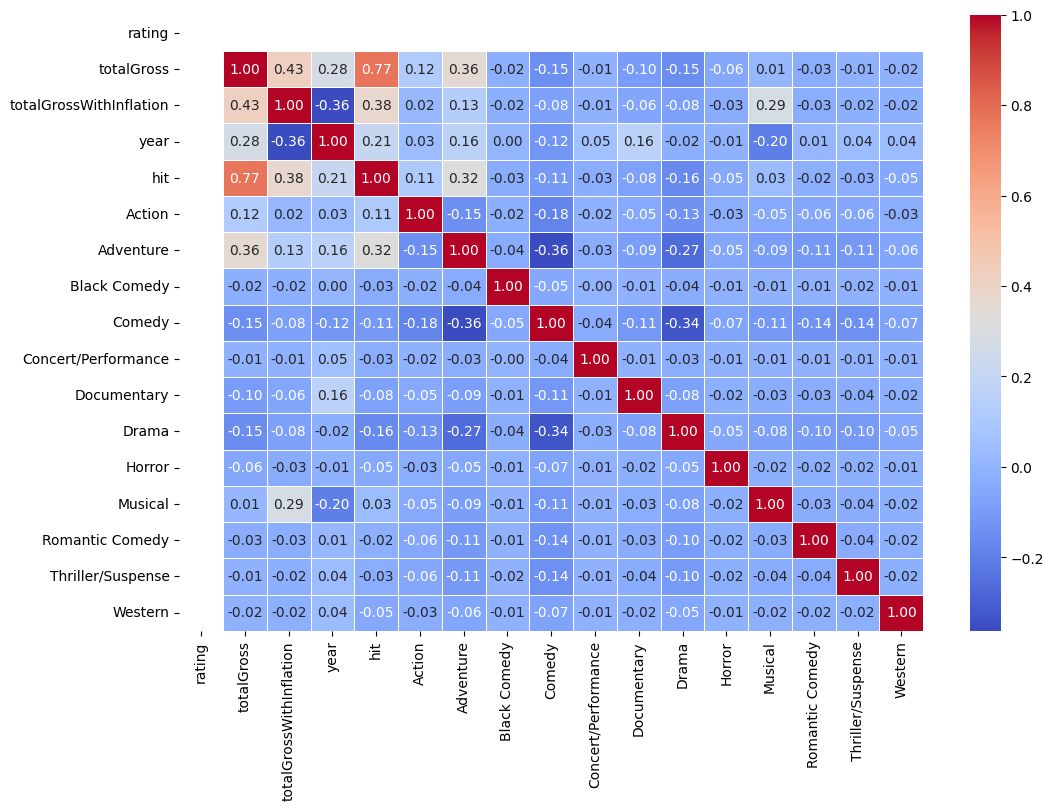

In [ ]:
# Label Encoder
ratingOrder = ['Not Rated', 'R', 'PG-13', 'PG', 'G']

ratingMap = {}
for idx, rating in enumerate(ratingOrder):
    ratingMap[rating] = idx

df['rating'] = df['rating'].map(ratingMap)
df.head(20)

# One Hot Encoder / Get Dummies
encodedDf = pd.get_dummies(df, columns=['genre'], prefix='', prefix_sep='')
encodedDf

# Features Selection
plt.figure(figsize=(12, 8))
sns.heatmap(encodedDf.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,annot_kws={'size': 6})

# X = encodedDf.drop(columns=['totalGross', 'totalGrossWithInflation', 'hit'])
X = encodedDf[['Adventure', 'year']]
y = encodedDf['hit']

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.20, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(f"Accuracy sur le train : {score_train:.2f}")
print(f"Accuracy sur le test : {score_test:.2f}")



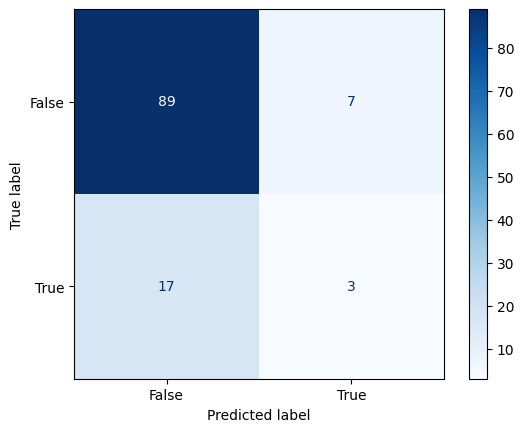

In [ ]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")

In [ ]:
# Métriques avancées
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Sensitivity/Recall:", recall_score(y_test, y_pred))

print("\n--- Rapport global ---\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.7931034482758621
Precision: 0.3
Sensitivity/Recall: 0.15

--- Rapport global ---

              precision    recall  f1-score   support

       False       0.84      0.93      0.88        96
        True       0.30      0.15      0.20        20

    accuracy                           0.79       116
   macro avg       0.57      0.54      0.54       116
weighted avg       0.75      0.79      0.76       116



### Méthode du Pipeline_ML Supervisé CLASSIFICATION_support


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
import pandas as pd

# 1. Mapping de rating
ratingOrder = ['Not Rated', 'R', 'PG-13', 'PG', 'G']
ratingMap = {rating: idx for idx, rating in enumerate(ratingOrder)}

def map_rating_array(X):
    # X est un numpy array 2D avec une seule colonne rating
    # on transforme en 1D array, on map, puis on reshape pour conserver la forme 2D
    import numpy as np
    X_flat = X.ravel()
    mapped = np.array([ratingMap.get(x, -1) for x in X_flat])  # -1 si pas dans map
    return mapped.reshape(-1, 1)

df = pd.read_csv('https://raw.githubusercontent.com/Fully-san/WildCodeSchool/refs/heads/master/disney_movies_total_gross.csv')
df = df.rename(columns={'movie_title' : 'title', 'release_date' : 'releaseDate', 'mpaa_rating' : 'rating', 'total_gross' : 'totalGross', 'inflation_adjusted_gross' : 'totalGrossWithInflation'})
df['year'] = pd.to_numeric(df['releaseDate'].str[:4])
df = df.drop(columns=['title', 'releaseDate'])
df['hit'] = df['totalGross'] >= 100000000


# 2. Séparer features / cible
X = df.drop(columns=['totalGross', 'totalGrossWithInflation', 'hit'])
y = df['hit']

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Colonnes
numeric_cols = X.select_dtypes(include='number').columns.tolist()
if 'rating' in numeric_cols:
    numeric_cols.remove('rating')  # on la traite séparément
categorical_cols = ['genre']
rating_col = ['rating']

# 5. Pipeline rating : imput puis mapping
rating_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='G')),
    ('mapper', FunctionTransformer(map_rating_array, validate=False))
])

# 6. Préprocessing
preprocessor = ColumnTransformer(transformers=[
    ('rating', rating_pipeline, rating_col),
    ('genre', OneHotEncoder(drop='first'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# 7. Pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# 8. Fit + évaluation
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f"Accuracy train : {pipeline.score(X_train, y_train):.2f}")
print(f"Accuracy test  : {pipeline.score(X_test, y_test):.2f}")
print(f"Sensitivity (recall) : {recall_score(y_test, y_pred):.2f}")


Accuracy train : 0.87
Accuracy test  : 0.79
Sensitivity (recall) : 0.10


# ML_non supervisé_Segmentation (KMeans)

### ML_non supervisé_Segmentation (KMeans) : KElbowVisualizer + silhouette_visualizer

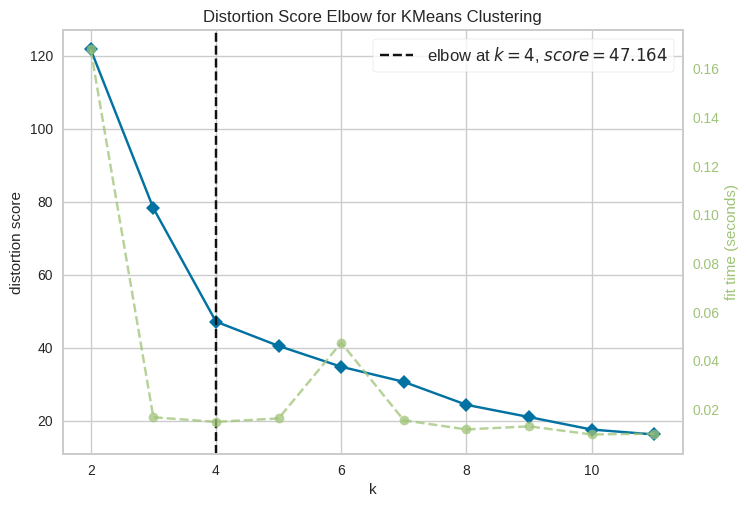

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ylebecque/SQL_DBs/refs/heads/main/customer_location_data.csv")

df.head()

### Trouver la meilleur k : score elbow selon Kmeans

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Sélection et standardisation des données
fm=df[['Order Frequency', 'Total Spend']] # X  = fm

scaled_fm = StandardScaler().fit_transform(fm)

# modèle
model = KMeans()

# Recherche du meilleur paramètre k avec Elbow / Silhouette

visualiser = KElbowVisualizer(model, k=(2, 12))

visualiser.fit(scaled_fm)

visualiser.show()


In [ ]:
visualiser = KElbowVisualizer(model, k=(3, 12), metric = 'silhouette')

visualiser.fit(scaled_fm)

visualiser.show()

plt.show()

In [ ]:
# avec méthode silhouette

from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(12, random_state=42), scaled_fm, colors='yellowbrick')

In [ ]:
# Créez un modèle KMeans avec les paramètres précédents

# Création du modèle avec le nombre de clusters optimal

model = KMeans(n_clusters = 4, random_state=42)

# Entrainement du modèle sur les données standardisées
segment = model.fit_predict(scaled_fm)

# Ajout des clusters dans une nouvelle colonne Segment
df['Segment'] = model.labels_
df.head()

In [ ]:
# Affichage des boxplots des différents segments de clients
# Affichage des boxplots des différents segments de clients
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes
cols = ['Order Frequency', 'Total Spend']

###
plt.figure(figsize=(10, 5))

### Boucle pour afficher les deux boxplots dans des subplots
for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(
                 y=fm[col],
                 hue = df['Segment'],
                 palette = "pastel"
                 )
    plt.subplot(1, 2, i+1).set_title (f"Distribution of {col} by Segment")
plt.tight_layout()
plt.show()

# DL

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/310M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/806k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

Device set to use cpu


## DL_Exemple translation

### Exemple 1 : translate from en to cn

In [ ]:
# !pip install transformers[sentencepiece]
# from transformers import pipeline
# translator_EnToCn = pipeline("translation", model = "Eric01/marian-finetuned-kde4-en-to-cn")

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


In [ ]:
# texte = "Our life is not our own, from the womb to the grave, and others are closely linked.Regardless of past life, an evil, each charity will determine our future rebirth. "
# translator_EnToCn(texte)

[{'translation_text': '我们的生命不是我们自己的, 从子宫到墓地, 其他人是紧密相连的。 与过去的生死无关, 是一种魔鬼, 每个施舍都会决定我们未来的重生 。'}]

### Exemple 2 : translate from en to fr

In [30]:
!pip install transformers[sentencepiece]
from transformers import pipeline
# pipeline("La tache", model="Le model qu'on a choisi")
traducteurEntoFr = pipeline("translation", model="huggingface-course/marian-finetuned-kde4-en-to-fr")
# https://huggingface.co/Shaarang/marian-finetuned-kde4-en-to-fr
# Helsinki-NLP/opus-mt-fr-en
# Lien Guthug pour trouver des DL
# https://huggingface.co/C-n/random-initialization-kde4-en-to-fr
# https://huggingface.co/datasets/iulusoy/test-transformers-pipeline

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/299M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/299M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cpu


In [31]:
texte = "Our life is not our own, from the womb to the grave, and others are closely linked.Regardless of past life, an evil, each charity will determine our future rebirth. "
traducteurEntoFr(texte)

[{'translation_text': "Notre vie n'est pas la nôtre, depuis le sein jusqu'à la tombe, et les autres sont étroitement liés. Indépendamment de la vie passée, un mal, chaque charité déterminera notre future renaître."}]

## Exemple 3 : translate from fr to en

In [32]:
!pip install transformers[sentencepiece]
from transformers import pipeline
# pipeline("La tache", model="Le model qu'on a choisi")
traducteurFrtoEn = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
# https://huggingface.co/datasets/iulusoy/test-transformers-pipeline

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


In [34]:
texte = "On ne voit bien qu’avec le cœur. L’essentiel est invisible pour les yeux."
traducteurFrtoEn(texte)

[{'translation_text': 'You can only see with the heart. The essential is invisible to the eyes.'}]

## DL_avec pipeline_sentiement analyst

### Exemple 0 : businesse cas_ amzon_ analyse sentiment_ selon reviews.text

In [ ]:
# le sentiment analyst avec pipeline
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis") # pipeline transformers python
df2["sentiment"] = df2["reviews.text"].apply(lambda txt: sentiment_pipeline(txt[:512])[0]['label'] if pd.notna(txt) else None)

### Example 1: Sentiment Analysis

In [ ]:
from transformers import pipeline
# Load a sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Analyze sentiment
result = sentiment_pipeline("I love using Hugging Face Transformers!")
print(result)

### Example 2: Text Summarization

In [ ]:
from transformers import pipeline
# Load a summarization pipeline
summarizer = pipeline("summarization")

# Summarize text
text = """Hugging Face Transformers is an open-source library that provides a wide variety of pre-trained models for natural language processing tasks. It is widely used in the AI community."""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary)
Example 3: Question Answering


### Example 3: Question Answering

In [ ]:
from transformers import pipeline

# Load a question-answering pipeline
qa_pipeline = pipeline("question-answering")

# Provide context and question
context = "Hugging Face is a company that develops tools for natural language processing."
question = "What does Hugging Face develop?"
answer = qa_pipeline(question=question, context=context)
print(answer)
These examples demonstrate how easy it is to use Hugging Face's pipeline for various NLP tasks. You can explore other tasks like translation, text generation, or named entity recognition by simply changing the task name in the pipeline() function.


# Matrice de confusion

In [ ]:
Matrice de confusion :,
from sklearn.metrics import confusion_matrix

Générer la matrice de confusion,
conf_matrix = confusion_matrix(y_test, y_test_pred)

Afficher la matrice de confusion,
print("Matrice de Confusion:")
print(confmatrix)
print(model.classes)

Extraire les valeurs de la matrice de confusion,
TN, FP, FN, TP = conf_matrix.ravel()

Afficher les valeurs de la matrice de confusion,
print(f"Vrai Négatif (TN) : {TN}")
print(f"Faux Positif (FP) : {FP}")
print(f"Faux Négatif (FN) : {FN}")
print(f"Vrai Positif (TP) : {TP}")

Affichage de la matrice de confusion avec une heatmap,
plt.figure(figsize=(8, 6))
sns.heatmap(confmatrix, annot=True, fmt='d', cmap='Blues', xticklabels= model.classes, yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()

# Regex

In [ ]:
re.findall(r" tex", string) # retourne un list
re.findall(r" tex", string)[0] # retourne une chaine de caractères
re.search(r" tex", string).group(0) # retourne un str

In [ ]:
def nettoyer_texte(text):
    """
    Fonction pour nettoyer les textes en supprimant certains motifs
    """
    re.sub(r'https?://\S+|www\.\S+', '', text) # remplacer les URLs
    #enlever les balises : tout ce qui peut etre entre des < .. >
    re.sub(r'<[^><]+>', '', text) # remplacer les balises HTML
    re.sub(r'\@+','',text) # remplacer les mentions '@'
    re.sub(r'\d+','',text) # remplacer les mots conntenant des chiffres
    re.sub(r'\n','',text) # remplacer les sauts de lignes ('\n')
    re.sub(r'[^\w\s]', '', text) # remplacer
     # remplacer les doubles espaces par un seul espace
    re.sub(r"\s+",'', text)
    texte_spacy =  nlp(text)
    final_text = ""
    for token in texte_spacy :
        if (  (token.is_stop == False)
               and (token.is_punct == False)
               and (token.is_digit == False)
               and (token.like_num == False)
               ) :
            final_text += token.lemma_ + " "

    return final_text.strip()

In [ ]:
from tqdm import tqdm
tqdm.pandas()

df['statement_low'] = df['statement_low'].progress_apply(nettoyer_texte)

# NLP_étapes

In [ ]:
# Pipeline de Machine Learning pour l'Analyse de Sentiment #

Préparation des données : Nettoyer le texte (supprimer les token inutiles, convertir en minuscules), par ex supprimer ponctuation, stopword, appliquer un lemmatizer ou stemmer

Vectorisation Tokeniser et vectoriser les textes (par exemple avec TF-IDF ou countvectorizer).

Séparation des données : Diviser les données en ensembles d'entraînement (80%) et de test (20%).

Choix du modèle : La régression logistique est la plus adaptée à l'analyse de sentiment

Entraîner le modèle avec les données d'entraînement et ajuster les hyperparamètres en cas d'overfitting.

Évaluation : Tester le modèle sur les données de test en utilisant des métriques comme accuracy score, précision, le rappel et le F1-score.


#VIZ Heatmap

#VIZ Histogramme

# VIZ BOXPLOT

# VIZ Barplot

# VIZ Scatter plot

# SCRAPING

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


## 1_Scraping : scraper une page web

### *1-1 Get html sans headers*

### *1-1 Get html avec headers*

In [ ]:
import requests
url = "https://en.wikipedia.org/wiki/Web_scraping"
html = requests.get(url)
navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
html = requests.get(url, headers={'User-Agent': navigator})

# utliser l'inspecteur (clic droit sur une page --> Inspecter
# Parsing : trouver la balise via BeautifulSoup

from bs4 import BeautifulSoup
# créer une "soupe", avec le code HTML
soup = BeautifulSoup(html.text, 'html.parser')
# chercher le bon morceaux dans cette soupe, grâce à la balise correspondante
titles_wiki = soup.find_all('span', {"class" : "mw-headline"})

### *1-2 Get html sans headers, scraper une page web, enregrister en df*

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

response = requests.get('https://forecast.weather.gov/MapClick.php?lat=34.09927000000058&lon=-118.33806999999996#.XX')
# html = response.text # à vérifier si la réponse == 200
soup = BeautifulSoup(response.content, 'html.parser')
week = soup.find(id='seven-day-forecast-body')
# print(week)

items = week.find_all(class_='tombstone-container') # ici c'set find_all
# print(items[0])

print(items[0].find(class_='period-name').get_text())
print(items[0].find(class_='short-desc').get_text())
print(items[0].find(class_='temp').get_text())

period_names = [item.find(class_='period-name').get_text() for item in items]
short_descriptions = [item.find(class_='short-desc').get_text() for item in items]
temperatures = [item.find(class_='temp').get_text() for item in items]

weather_stuff = pd.DataFrame({
    'period': period_names,
    'short_descriptions': short_descriptions,
    'temperatures': temperatures,
})

print(weather_stuff)
weather_stuff.to_csv('weather.csv')

Today
Patchy Fogthen Sunny
High: 83 °F
           period    short_descriptions temperatures
0           Today  Patchy Fogthen Sunny  High: 83 °F
1         Tonight            Patchy Fog   Low: 63 °F
2        Saturday  Patchy Fogthen Sunny  High: 79 °F
3  Saturday Night            Patchy Fog   Low: 62 °F
4          Sunday  Patchy Fogthen Sunny  High: 80 °F
5    Sunday Night            Patchy Fog   Low: 61 °F
6          Monday  Patchy Fogthen Sunny  High: 79 °F
7    Monday Night            Patchy Fog   Low: 60 °F
8         Tuesday  Patchy Fogthen Sunny  High: 76 °F


### *1-3 def scraper_page(url)*

In [ ]:
import requests
from bs4 import BeautifulSoup

# Fonction pour scraper une page
def scraper_page(url):

    reponse = requests.get(url)

# On vérifie que le site réponde avant d'aller plus loin
    if reponse.status_code == 200:
        soup = BeautifulSoup(reponse.text, 'html.parser')
        titles = soup.find_all('h2')

# On crée une liste vide pour stocker
        data = []

# On récupére le texte
        for title in titles:
            print(title.text)
            data.append(title.text)

# On programme la sortie de la fonction avec le return : notre texte.
        return data # Sous un format liste
# Autrement, on affiche le message d'erreur.
    else:
        print(f"Erreur lors de la récupération de la page {url}.")
# On peut aussi traiter le message d'erreur avec un "try" "except" si on connais le message d'erreur.

### *1-4 récupérer 1 élément + taiter Nan + traiter l'accent des lettres*

In [ ]:

import requests
from bs4 import BeautifulSoup

url = 'https://codeavecjonathan.com/scraping/recette/'

def get_text_if_not_none(e):
    if e:
        return e.text.strip()
    return None

response = requests.get(url)
response.encoding = response.apparent_encoding # traiter erreurs des accents en francais : ou en "utf-8"

if response.status_code == 200:
    html = response.text
    # print(html)
    f = open("recette.html", "w") # créer un fichier en html inclu toute la page scrapée
    f.write(html)
    f.close()

    soup = BeautifulSoup(html, "html5lib") # ici ou on peut utilser : "html.parser"

    titre = soup.find("h1").text # find : à trouver 1 élement
    print(titre)

    description = get_text_if_not_none(soup.find("p", class_="description")) # ici : get seulement les élements sans NaN
    print(description)

    # Ingrédients
    div_ingredients = soup.find("div", class_="ingredients")
    e_ingredients = div_ingredients.find_all("p")
    for e_ingredient in e_ingredients:
    print("INGREDIENT", e_ingredient.text)

    # Etapes
    # e_preparation = soup.select('.preparation_etape') # ici : ".preparation" = classe_="preparation_etape"
    table_preparation = soup.find("table", class_="preparation")
    e_etapes = table_preparation.find_all("td", class_="preparation_etape")
    for e_etape in e_etapes:
    print("ETAPES", e_etape.text)

## 2_Scraping : scraper plusieurs pages

### *2-1 def scraper_page(url)*

In [ ]:
import requests
from bs4 import BeautifulSoup

# Fonction pour scraper une page
def scraper_page(url):

    reponse = requests.get(url)

# On vérifie que le site réponde avant d'aller plus loin
    if reponse.status_code == 200:
        soup = BeautifulSoup(reponse.text, 'html.parser')
        titles = soup.find_all('h2')

# On crée une liste vide pour stocker
        data = []

# On récupére le texte
        for title in titles:
            print(title.text)
            data.append(title.text)

# On programme la sortie de la fonction avec le return : notre texte.
        return data # Sous un format liste
# Autrement, on affiche le message d'erreur.
    else:
        print(f"Erreur lors de la récupération de la page {url}.")
# On peut aussi traiter le message d'erreur avec un "try" "except" si on connais le message d'erreur.

### *2-2 def scraper_pages(urls): scraper plusieurs pages*

In [ ]:
# Fonction principale pour scraper plusieurs pages
def scraper_pages(urls):
    for url in urls:
        scraper_page(url)

# Liste d'URLs à scraper
urls_to_scrape = [
    "https://example.com/page1",
    "https://example.com/page2",
    "https://example.com/page3"
]

# Appeler la fonction pour scraper les pages
scraper_pages(urls_to_scrape)

### *2-3 def scraper_pages(urls): scraper plusieurs pages_cas complet*

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

all_books_data = []
base_url = 'http://books.toscrape.com/catalogue/'

# On boucle sur les 5 premières pages
for i in range(1, 6):
    url = f"{base_url}page-{i}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = soup.find_all('article', class_='product_pod')

    for article in articles:
        title = article.h3.a['title']
        price = article.find('p', class_='price_color').text
        availability = article.find('p', class_='instock availability').text.strip()
        relative_url = article.h3.a['href']
        # On s'assure que l'URL est toujours correcte
        book_url = base_url + relative_url

        all_books_data.append({
            'Titre': title,
            'Prix': price,
            'Disponibilité': availability,
            'URL': book_url
        })

df_all = pd.DataFrame(all_books_data)
df_all

,Titre,Prix,Disponibilité,URL
0,A Light in the Attic,£51.77,In stock,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,£53.74,In stock,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,£50.10,In stock,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,£47.82,In stock,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,£54.23,In stock,http://books.toscrape.com/catalogue/sapiens-a-...
...,...,...,...,...
95,Lumberjanes Vol. 3: A Terrible Plan (Lumberjan...,£19.92,In stock,http://books.toscrape.com/catalogue/lumberjane...
96,"Layered: Baking, Building, and Styling Spectac...",£40.11,In stock,http://books.toscrape.com/catalogue/layered-ba...
97,Judo: Seven Steps to Black Belt (an Introducto...,£53.90,In stock,http://books.toscrape.com/catalogue/judo-seven...
98,Join,£35.67,In stock,http://books.toscrape.com/catalogue/join_902/i...


### *2-4 scraping_crawl_funtion_exemple1*

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

def crawl(url_short):
    url = "https://www.allocine.fr" + url_short
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    detail = soup.find("div", {"class" : "meta-body-item meta-body-info"})
    regex_output = re.findall("(\d+)(h )(\d+)(min)", str(detail))[0]
    return int(regex_output[0]) * 60 + int(regex_output[2])

crawl("/film/fichefilm_gen_cfilm=251315.html")

150

### *2-4 scraping_crawl_funtion_exemple2*

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
url = "https://www.allocine.fr/personne/fichepersonne-30367/filmographie/"
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')
# Nous filtrons maintenant uniquement sur les films dont l'artiste est le réalisateur :
soup_director = soup.find('div', {"class" : "gd-col-left"})
# Puis nous cherchons tous les liens contenus dans cet encadré :
links = soup_director.find_all('a')

print(links[0]["href"])
print(links[0]["title"])

df_url = pd.DataFrame({"title" : [i["title"] for i in links],
              "href" : [i["href"] for i in links]})
df_url

/film/fichefilm_gen_cfilm=244186.html
The Prisoner


,title,href
0,The Prisoner,/film/fichefilm_gen_cfilm=244186.html
1,L'Odyssée,/film/fichefilm_gen_cfilm=1000013045.html
2,Oppenheimer,/film/fichefilm_gen_cfilm=296168.html
3,Tenet,/film/fichefilm_gen_cfilm=251315.html
4,Dunkerque,/film/fichefilm_gen_cfilm=240850.html
5,Quay,/film/fichefilm_gen_cfilm=239766.html
6,Interstellar,/film/fichefilm_gen_cfilm=114782.html
7,The Dark Knight Rises,/film/fichefilm_gen_cfilm=132874.html
8,Inception,/film/fichefilm_gen_cfilm=143692.html
9,"The Dark Knight, Le Chevalier Noir",/film/fichefilm_gen_cfilm=115362.html


In [ ]:
# 使用 Selenium 自动化 :
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()
driver.get("https://www.google.com")
search_box = driver.find_element(By.NAME, "q")
search_box.send_keys("web scraping")
search_box.send_keys(Keys.RETURN)

ModuleNotFoundError: No module named 'selenium'

In [ ]:
#  使用 Helium 库:

from helium import *

browser = start_chrome()
go_to('https://duckduckgo.com/')
write('github')
press(ENTER)
click('GitHub')
browser.quit()

ModuleNotFoundError: No module named 'helium'